In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('/Users/jyyang/Desktop/DA/ind_proj/data/train.csv')
test_data = pd.read_csv('/Users/jyyang/Desktop/DA/ind_proj/data/test.csv')

In [3]:
train_data.columns

Index(['id', 'MO HLADR+ MFI (cells/ul)', 'Neu CD64+MFI (cells/ul)',
       'CD3+T (cells/ul)', 'CD8+T (cells/ul)', 'CD4+T (cells/ul)',
       'NK (cells/ul)', 'CD19+ (cells/ul)', 'CD45+ (cells/ul)', 'Age',
       'Sex 0M1F', 'Mono CD64+MFI (cells/ul)', 'label'],
      dtype='object')

<AxesSubplot:>

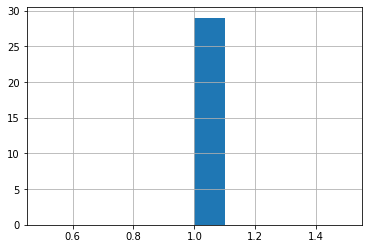

In [5]:
train_data[train_data['label']==1]['label'].hist()

<AxesSubplot:>

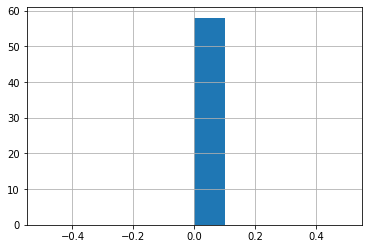

In [7]:
train_data[train_data['label']==0]['label'].hist()

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        87 non-null     int64  
 1   MO HLADR+ MFI (cells/ul)  86 non-null     float64
 2   Neu CD64+MFI (cells/ul)   86 non-null     float64
 3   CD3+T (cells/ul)          87 non-null     float64
 4   CD8+T (cells/ul)          87 non-null     float64
 5   CD4+T (cells/ul)          87 non-null     float64
 6   NK (cells/ul)             87 non-null     float64
 7   CD19+ (cells/ul)          87 non-null     float64
 8   CD45+ (cells/ul)          87 non-null     float64
 9   Age                       87 non-null     int64  
 10  Sex 0M1F                  87 non-null     int64  
 11  Mono CD64+MFI (cells/ul)  86 non-null     float64
 12  label                     87 non-null     int64  
dtypes: float64(9), int64(4)
memory usage: 9.0 KB


In [19]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        59 non-null     int64  
 1   MO HLADR+ MFI (cells/ul)  59 non-null     float64
 2   Neu CD64+MFI (cells/ul)   59 non-null     float64
 3   CD3+T (cells/ul)          59 non-null     float64
 4   CD8+T (cells/ul)          59 non-null     float64
 5   CD4+T (cells/ul)          59 non-null     float64
 6   NK (cells/ul)             59 non-null     float64
 7   CD19+ (cells/ul)          59 non-null     float64
 8   CD45+ (cells/ul)          59 non-null     float64
 9   Age                       59 non-null     int64  
 10  Sex 0M1F                  59 non-null     int64  
 11  Mono CD64+MFI (cells/ul)  59 non-null     float64
dtypes: float64(9), int64(3)
memory usage: 5.7 KB


From above we can find that, in training data, features 'MO HLADR+ MFI (cells/ul)', 'Neu CD64+MFI (cells/ul)' and 'Mono CD64+MFI (cells/ul)' contain missing values, so in the preprocessing step, I will first use mean value to impute.

In [23]:
# impute missing values
miss_val_cols = ['MO HLADR+ MFI (cells/ul)', 'Neu CD64+MFI (cells/ul)', 'Mono CD64+MFI (cells/ul)']
for col in miss_val_cols:
    train_data.loc[39, col] = train_data[train_data['label']==0][col].mean()
    

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        87 non-null     int64  
 1   MO HLADR+ MFI (cells/ul)  87 non-null     float64
 2   Neu CD64+MFI (cells/ul)   87 non-null     float64
 3   CD3+T (cells/ul)          87 non-null     float64
 4   CD8+T (cells/ul)          87 non-null     float64
 5   CD4+T (cells/ul)          87 non-null     float64
 6   NK (cells/ul)             87 non-null     float64
 7   CD19+ (cells/ul)          87 non-null     float64
 8   CD45+ (cells/ul)          87 non-null     float64
 9   Age                       87 non-null     int64  
 10  Sex 0M1F                  87 non-null     int64  
 11  Mono CD64+MFI (cells/ul)  87 non-null     float64
 12  label                     87 non-null     int64  
dtypes: float64(9), int64(4)
memory usage: 9.0 KB


<AxesSubplot:>

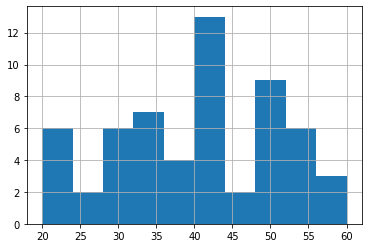

In [26]:
# EDA
col = 'Age' # change it to any of the 12 features in the feature column to see how data distributes among both healthy people and patients
train_data[train_data['label']==0]['Age'].hist()

<AxesSubplot:>

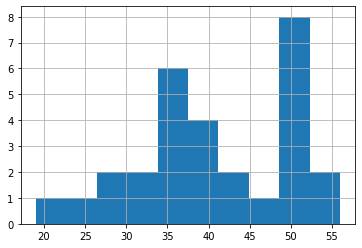

In [27]:
# EDA
col = 'Age' # change it to any of the 12 features in the feature column to see how data distributes among both healthy people and patients
train_data[train_data['label']==1]['Age'].hist()

2, From above exploratory data analysis we find that for patients:
- MO HLADR+ MFI value is relatively low and range between 0 and 1000
- Neu CD64+MFI is relatively high and specifically, people with higher than 250 values are all patients
- CD3+T, CD8+T, CD4+T, NK, CD19+, CD45+ are not very significant among normal and sick people. It can only be inferred that some normal people have higher values and people with lower values are more likely to get sick.
- For Mono CD64+MFI, normal people tend to have a value between 1000 and 2000, and people with values higher than 5000 are bound to be sick. 
- Age and Sex 0M1F are the least significant variables among all so I decide to remove these two when building the model

In [123]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2').fit(train_data.drop(['Age', \
                                'Sex 0M1F', 'label'], axis=1), train_data['label'])



/Users/jyyang/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [127]:
preds = lr.predict(test_data.drop(['Age', 'Sex 0M1F'], axis=1))

In [128]:
lr_df = pd.DataFrame()
lr_df['id'] = list(range(len(preds)))
lr_df['label'] = preds

In [136]:
lr_df.to_csv('submission.csv',index=None)

In [137]:
load_df = pd.read_csv('submission.csv')

In [138]:
load_df.head()

,id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
